In [1]:


import matplotlib
%matplotlib widget
# %matplotlib notebook

from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd 

# import sklearn
# from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder, PolynomialFeatures, MaxAbsScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score, confusion_matrix
import numpy.random as r
import disarray

import pickle 
from mpl_toolkits import mplot3d
import seaborn


Preprocessing the data!

In [2]:
file_path = "rf_signal_data.csv"
rf_data = pd.read_csv(file_path)

#check how the data looks
#print(rf_data)
dnnd = 7
#Let's hot encode the modulation types, weather conditions, interference type, Antenna Type, and device status using integers
label_encoder = LabelEncoder()
rf_data['Modulation_Original'] = rf_data['Modulation']
rf_data['Modulation'] = label_encoder.fit_transform(rf_data['Modulation']) + 1  # Add 1 to avoid 0 indexing
rf_data['Interference Type'] = label_encoder.fit_transform(rf_data['Interference Type']) + 1
rf_data['Weather Condition'] = label_encoder.fit_transform(rf_data['Weather Condition']) + 1
rf_data['Device Status'] = label_encoder.fit_transform(rf_data['Device Status']) + 1
rf_data['Antenna Type'] = label_encoder.fit_transform(rf_data['Antenna Type']) + 1
rf_data['Device Type'] = label_encoder.fit_transform(rf_data['Device Type']) + 1
# print(rf_data)

X = rf_data.loc[:,~rf_data.columns.isin(['Device Status','Modulation','Timestamp','Location','Latitude','Longitude','Altitude','Air Pressure','I/Q Data','Modulation_Original','Weather Condition','Antenna Type', 'Battery Level' ])]
y = rf_data['Modulation']

#Split the data into test data and validation data
X_train, X_test, y_train, y_test = train_test_split( X, y,random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X)
# print(X_train)

# Supervised Analysis I: Logistic Regression

In [3]:
# trainingError, validationError, variance, recall = [[1, 2, 3, 4, 5],[1, 2, 3, 4, 5],[1, 2, 3, 4, 5]], [], [], []
# for each in overfitting(3):
#     for each in regularization(5):
#         train the Model
#         trainingError[overfit][regular] = training error of this model



Process the data so that we can perform logistic regression:

In [4]:
ones = np.ones((X_train.shape[0],1))
ones2 = np.ones((X_test.shape[0],1))
X_train = np.hstack((ones,X_train))
X_test = np.hstack((ones2,X_test))
# y_train = np.array(y_train).reshape(-1, 1)
# y_test = np.array(y_test).reshape(-1, 1)

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# class_names=['1', '2', '3', '4', '5', '6'] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

# plt.Text(0.5,257.44,'Predicted label')

In [6]:
polyOrders = [1, 2, 3]
CSValues = [1, 2, 5, 10]
# polyOrders = [3]
# CSValues = [4, 6]

In [7]:
XTrainPolynomialDegrees = {}
XTestPolynomialDegrees = {}

# polyOrders = [1]
maxScaler = MaxAbsScaler()
normalScaler = Normalizer()
for i in polyOrders:
    poly = PolynomialFeatures(i)
    XTrainPolynomialDegrees[i] = maxScaler.fit_transform(scaler.fit_transform(poly.fit_transform(X_train)))
    XTestPolynomialDegrees[i] = maxScaler.fit_transform(scaler.fit_transform(poly.fit_transform(X_test)))


In [8]:
# iters = np.array(range(0,num_iters,10))
# # iters = np.array(range(num_iters))
# plt.plot(iters,log_likelihood_values,'.-',color='green')
# plt.xlabel('Number of iterations')
# plt.ylabel('Log-Likelihood')
# plt.title("Log-Likelihood vs Number of Iterations.")
# plt.grid()
# plt.show(block=False)

In [9]:

# # CSValues = [1, 2]
# dict = {}
# for j in CSValues:
#     dict[f'CS = {j}']={}
#     for i in polyOrders:
#         print(f"Now performing CS = {j}, Polynomial order of data = {i}")
#         dict[f'CS = {j}'][f'Polynomial order of data = {i}']={}
#         logreg = LogisticRegressionCV(Cs =j,random_state=32, multi_class='multinomial', penalty = 'elasticnet',max_iter=20, solver = 'saga', l1_ratios=[.25], cv=2, n_jobs= -1)
#         logreg.fit(XTrainPolynomialDegrees[i], y_train)
#         y_pred = logreg.predict(XTestPolynomialDegrees[i])
#         training_error = 1-logreg.score(XTrainPolynomialDegrees[i],y_train)
#         validation_error = 1-logreg.score(XTestPolynomialDegrees[i],y_test)
#         dict[f'CS = {j}'][f'Polynomial order of data = {i}'] = [training_error, validation_error, y_pred, logreg.coefs_paths_, logreg.intercept_]


# # # CsMin = 1
# # # CsMax = 1
# # # for j in range(CsMin, CsMax+1):
# # #     dict[j]={}
# # #     for i in range(len(XTrainPolynomialDegrees)):
# # #         logreg = LogisticRegressionCV(Cs =j,random_state=32, multi_class='multinomial', penalty = 'elasticnet',max_iter=1000, solver = 'saga', l1_ratios=[0], cv=0)
# # #         # logreg = LogisticRegression(random_state=32, multi_class='multinomial', penalty = 'elasticnet',max_iter=1000, solver = 'saga', l1_ratios=[0], cv=0)
# # #         logreg.fit(XTrainPolynomialDegrees[i], y_train)
# # #         y_pred_regularized = logreg.predict(XTestPolynomialDegrees[i])
# # #         # training_error = 1-logreg.score(XTrainPolynomialDegrees[i],y_train)
# # #         # validation_error = 1-logreg.score(XTestPolynomialDegrees[i],y_test)
# # #         # cnf_matrix = confusion_matrix(y_test, y_pred)
# # #         # dict[j][i] = [training_error, validation_error, cnf_matrix, y_pred]
# # #         dict[j][i]

        
        

In [10]:
# for j in range(CsMin, CsMax+1):
#     for i in range(len(XTrainPolynomialDegrees)):
#         df = pd.DataFrame(dict[j][i][2], index= ['8PSK','AM','BPSK','FM','QAM','QPSK'], columns=['8PSK','AM','BPSK','FM','QAM','QPSK'])
#         dict[j][i].append(df.da.export_metrics())
        
#         # TP = np.diag(dict[j][i][2])
#         # # print(TP)
#         # FP = np.sum(dict[j][i][2],axis=0) - TP
#         # # print(FP)
#         # FN = np.sum(dict[j][i][2], axis=1) - TP
#         # # print(FN)
#         # num_classes = 6
#         # TN = []
#         # for k in range(num_classes):
#         #     temp = np.delete(dict[j][i][2], k, 0)    # delete ith row
#         #     temp = np.delete(temp, k, 1)  # delete ith column
#         #     TN.append(sum(sum(temp)))
#         # TN = sum(TN)
#         # TP = TP.sum()
#         # FP = FP.sum()
#         # FN = FN.sum()
#         # # print(TN)
#         # stuff = [TP,FP,FN,TN,(TP/(TP+FP)),(TP/(TP+FN))]
#         # # print(stuff)
#         # # print(dict[j][i])
#         # [dict[j][i].append(elem) for elem in stuff]
#         # # print(dict[j][i])


# print(r2_score(y_test, y_pred))

# print(dict[1][0][3])

# # for j in range(CsMin, CsMax+1):
# #     for i in range(len(XTrainPolynomialDegrees)):
# #         print(f'For a degree {i+1} transformation of the data, with Cs = {j}, the precision is {dict[j][i][-2]} and the recall is {dict[j][i][-1]}, TP: {dict[j][i][-6]}, FP: {dict[j][i][-5]}, FN: {dict[j][i][-4]}, TN: {dict[j][i][-3]}')


# print('')
# for j in range(CsMin, CsMax+1):
#     for i in range(len(XTrainPolynomialDegrees)):
#         print(f'For a degree {i+1} transformation of the data, with Cs = {j}, the training error is {dict[j][i][0]} and the validation error is {dict[j][i][1]}')
# print('')
# for j in range(CsMin, CsMax+1):
#     for i in range(len(XTrainPolynomialDegrees)):
#         print(f'For a degree {i+1} transformation of the data, with Cs = {j}, the training accuracy is {1-dict[j][i][0]} and the validation accuracy is {1-dict[j][i][1]}')

In [11]:
# # cnf_matrix = confusion_matrix(y_test, y_pred)

  
# # Create a variable 

  
# # Open a file and use dump() 
# with open('LogisticRegResults4CS3DNormal&StandardScalers.pkl', 'wb') as file: 
      
#     # A new file will be created 
#     pickle.dump(dict, file)

In [12]:
with open('LogisticRegResults4CS3DStandardScalerColumnY.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
    dict = pickle.load(file) 
  


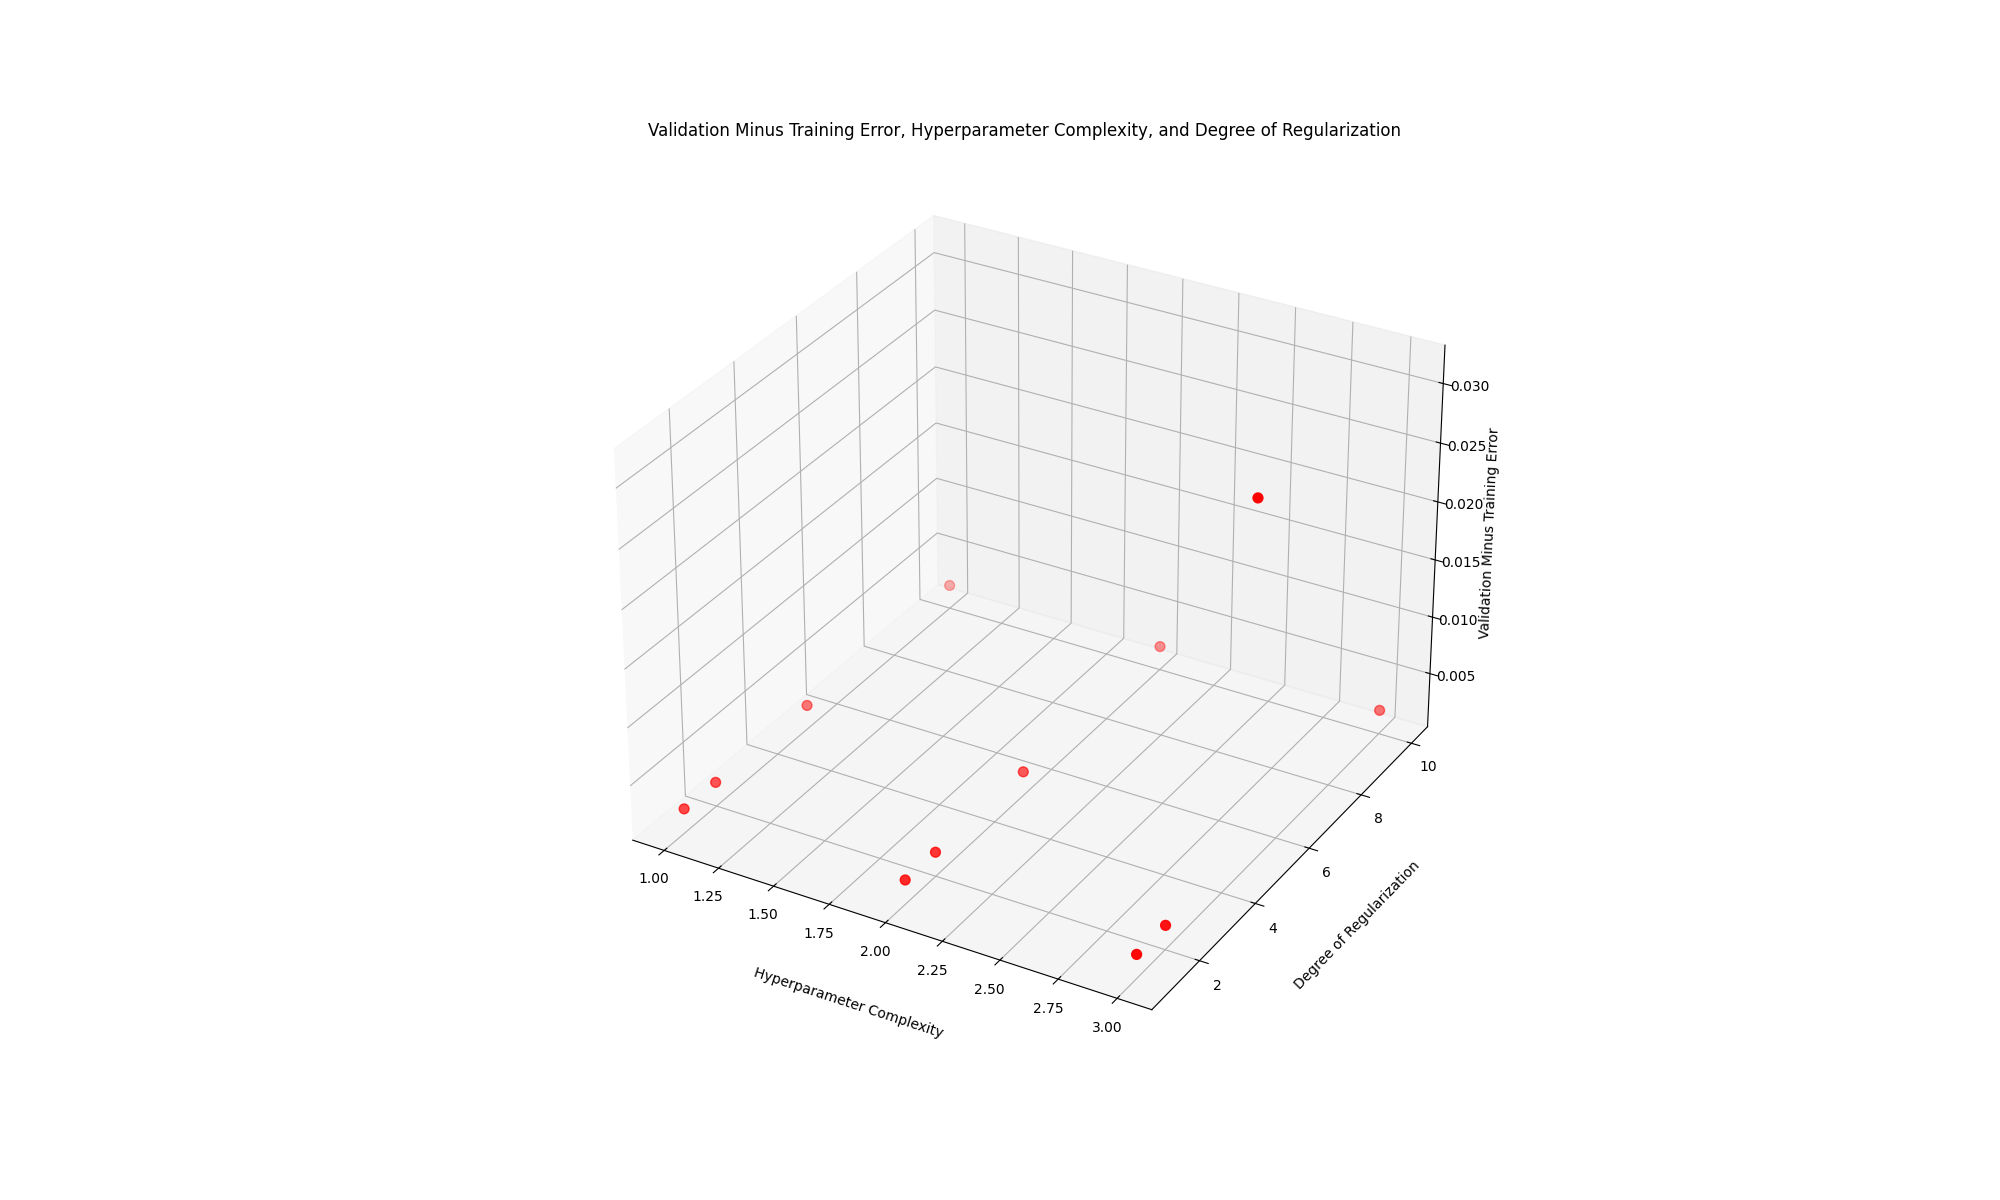

In [13]:
# %matplotlib notebook
x = polyOrders
y = CSValues
X, Y = np.meshgrid(x,y)

Z = np.zeros(X.shape)
for j in range(Z.shape[0]):
    for i in range(Z.shape[1]):
        Z[j, i]= dict[f'CS = {Y[j, i]}'][f'Polynomial order of data = {X[j, i]}'][1] - dict[f'CS = {Y[j, i]}'][f'Polynomial order of data = {X[j, i]}'][0]


fig = plt.figure(figsize = (20,12))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(X, Y, Z, c = 'r', s = 50)

ax.set_title('Validation Minus Training Error, Hyperparameter Complexity, and Degree of Regularization')

# Set axes label
ax.set_xlabel('Hyperparameter Complexity', labelpad=20)
ax.set_ylabel('Degree of Regularization', labelpad=20)
ax.set_zlabel('Validation Minus Training Error', labelpad=3)
plt.show()

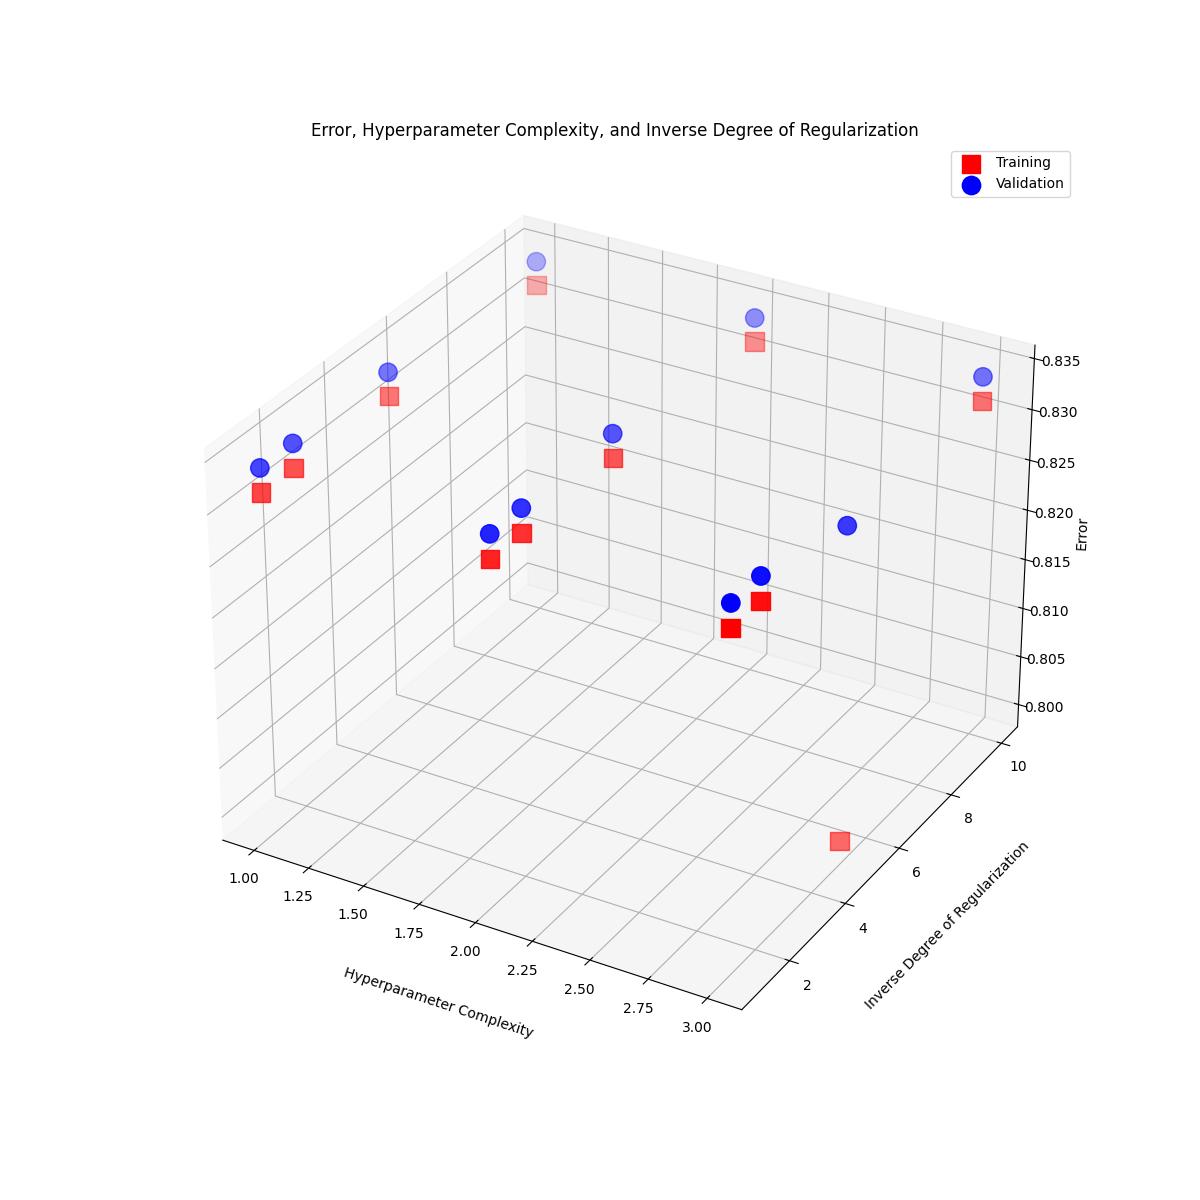

In [14]:
# %matplotlib inline
# print(plt.style.available)
plt.style.use('seaborn-v0_8-pastel')

x = polyOrders
y = CSValues
X, Y = np.meshgrid(x,y)


Z_training = np.zeros(X.shape)
for j in range(Z.shape[0]):
    for i in range(Z.shape[1]):
        Z_training[j, i]= dict[f'CS = {Y[j, i]}'][f'Polynomial order of data = {X[j, i]}'][0]

Z_validation = np.zeros(X.shape)
for j in range(Z.shape[0]):
    for i in range(Z.shape[1]):
        Z_validation[j, i]= dict[f'CS = {Y[j, i]}'][f'Polynomial order of data = {X[j, i]}'][1]

fig = plt.figure(figsize = (12, 12))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(X, Y, Z_training, c = 'r', s = 175, label = "Training", marker = 's')
ax.scatter(X, Y, Z_validation, c = 'b', s = 175, label = "Validation")

ax.set_title('Error, Hyperparameter Complexity, and Inverse Degree of Regularization')
ax.legend()

# Set axes label
ax.set_xlabel('Hyperparameter Complexity', labelpad=20)
ax.set_ylabel('Inverse Degree of Regularization', labelpad=20)
ax.set_zlabel('Error', labelpad=4)
plt.show()

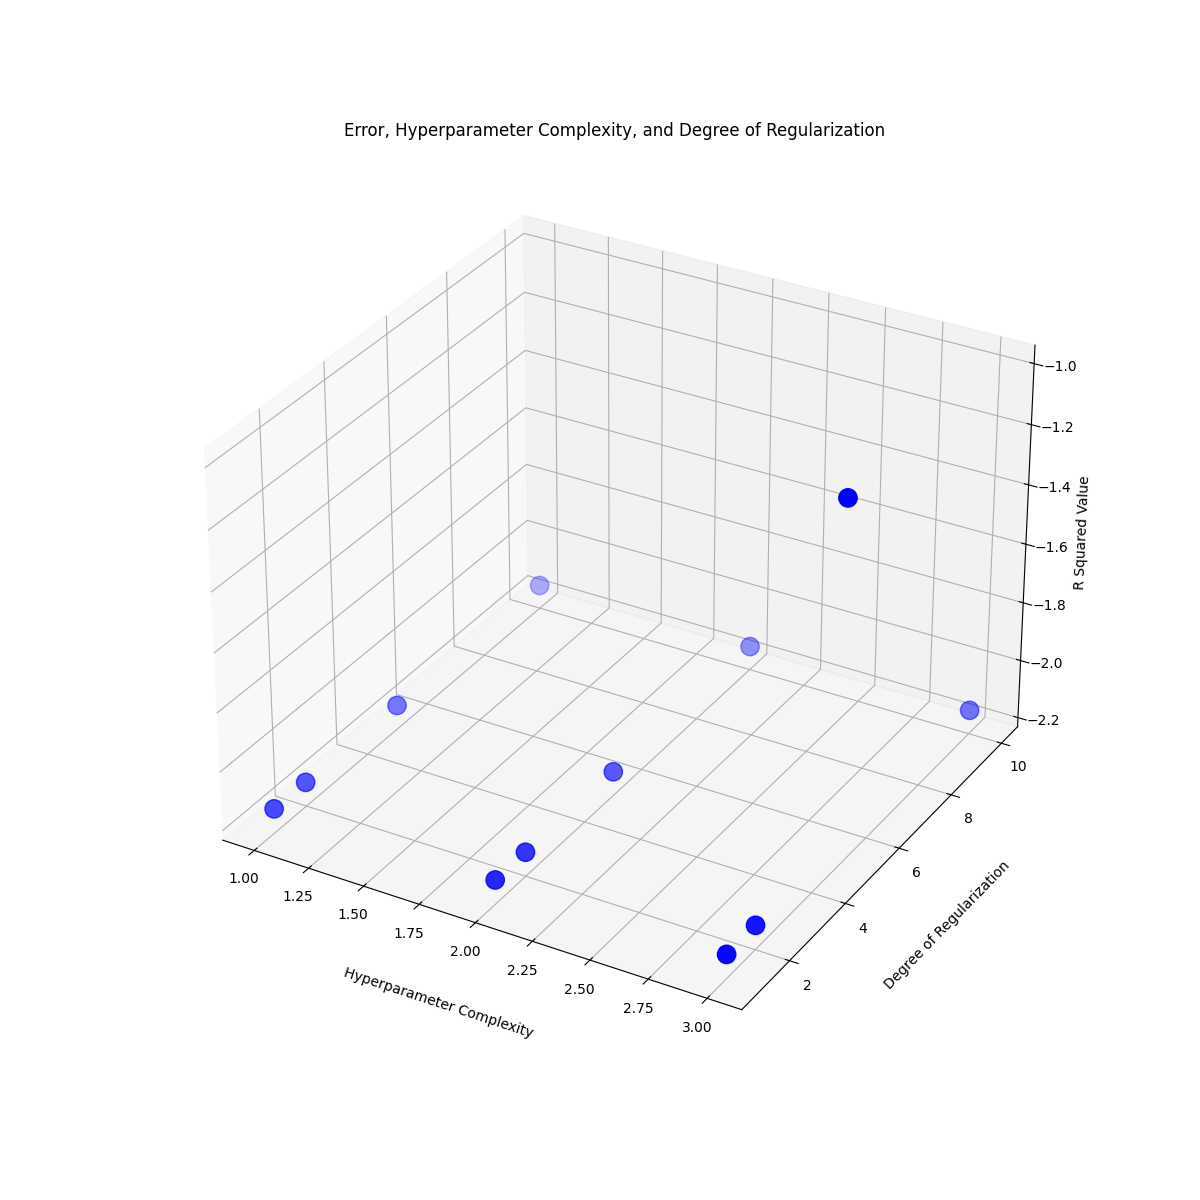

In [15]:
# %matplotlib inline
# print(plt.style.available)
plt.style.use('seaborn-v0_8-pastel')

x = polyOrders
y = CSValues
X, Y = np.meshgrid(x,y)


R2 = np.zeros(X.shape)
for j in range(Z.shape[0]):
    for i in range(Z.shape[1]):
        R2[j, i]= r2_score(y_test, dict[f'CS = {Y[j, i]}'][f'Polynomial order of data = {X[j, i]}'][2])



fig = plt.figure(figsize = (12, 12))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(X, Y, R2, c = 'b', s = 175, label = "R2")

ax.set_title('Error, Hyperparameter Complexity, R Squared Value')
# ax.legend()

# Set axes label
ax.set_xlabel('Hyperparameter Complexity', labelpad=20)
ax.set_ylabel('Degree of Regularization', labelpad=20)
ax.set_zlabel('R Squared Value', labelpad=4)
plt.show()